In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
df = pd.read_csv('students_dropout_academic_success.csv')
df.head(10)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
df.shape

(4424, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
print ('NULL VALUES:')
print ('------------')
df.isnull().sum()

NULL VALUES:
------------


Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
print ('DUPLICATED ROWS:')
df.duplicated().sum()

DUPLICATED ROWS:


0

In [8]:
print ('UNIQUE VALUES:')
print ('--------------')
df.nunique()

UNIQUE VALUES:
--------------


Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [9]:
print ('TARGET VARIABLE VALUE COUNTS:')
print ('----------------------------')
df['target'].value_counts()

TARGET VARIABLE VALUE COUNTS:
----------------------------


Graduate    2209
Dropout     1421
Enrolled     794
Name: target, dtype: int64

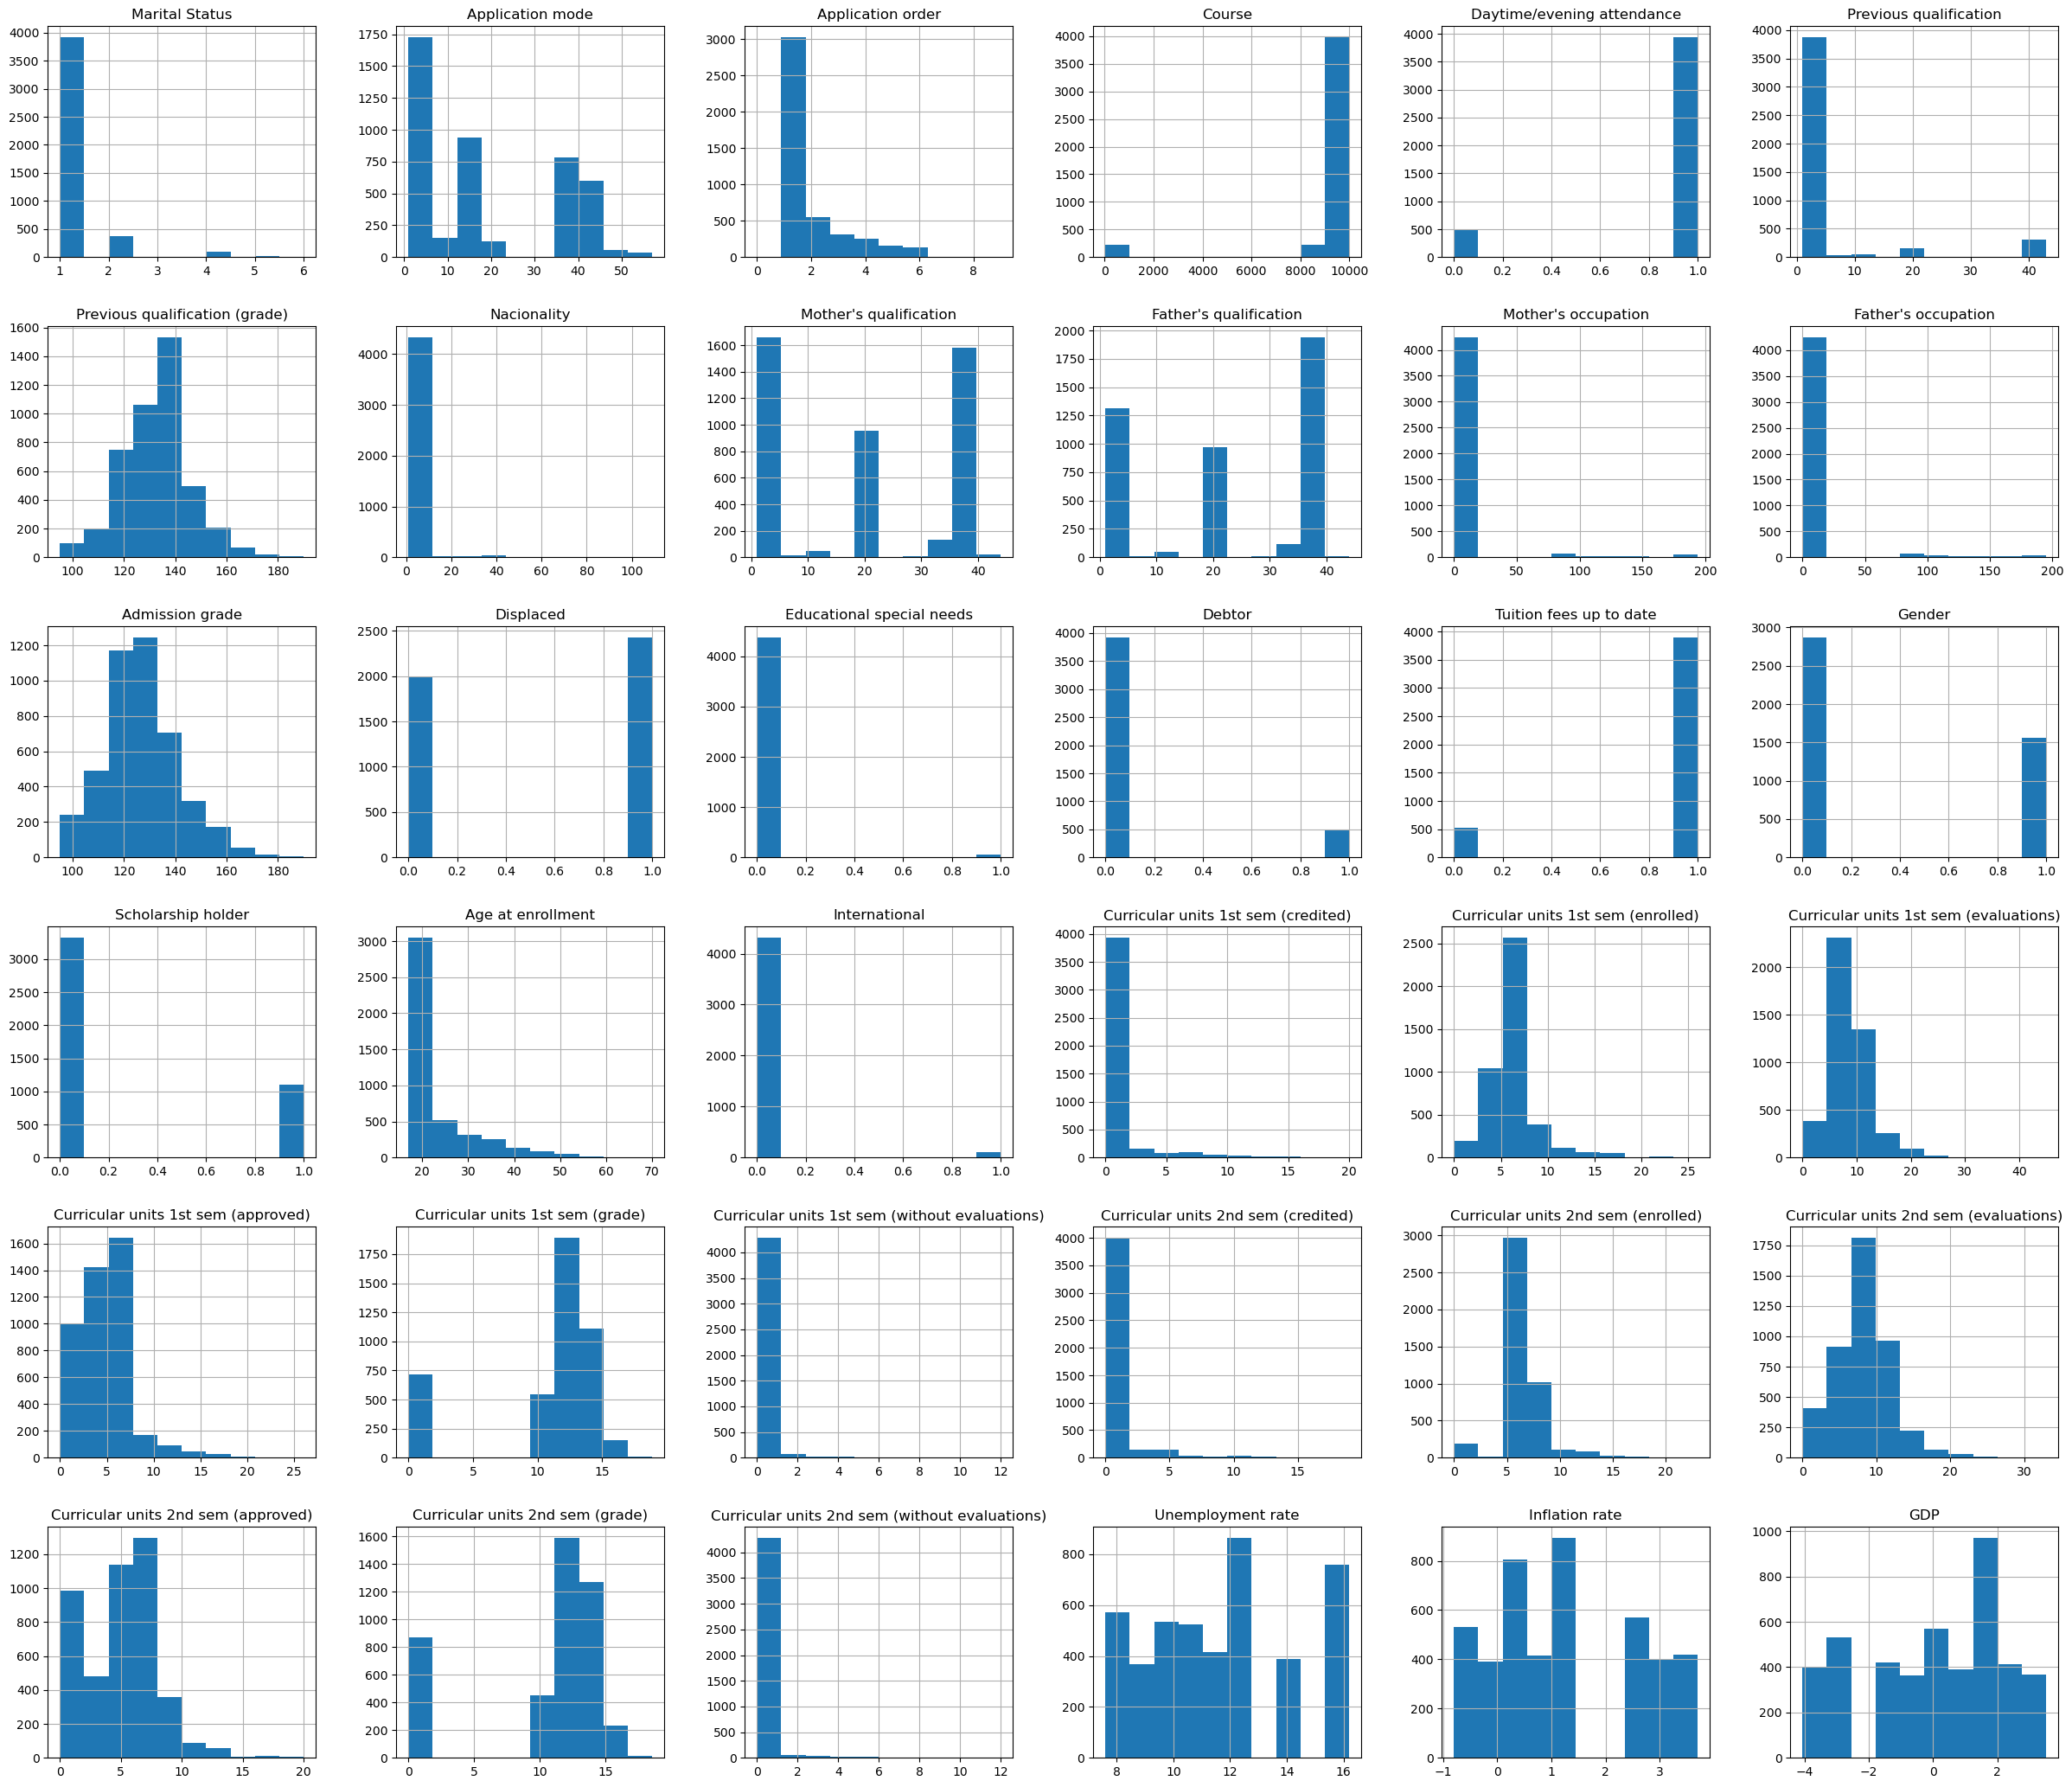

In [10]:
df.hist(figsize=(30,26))
plt.show()

In [11]:
print ('IDENTIFY CONSTANT FEATURES:')
print ('--------------------------')
for col in df:
    top_pct = df[col].value_counts(normalize=True).max()
    if top_pct > 0.90:
        print(f'Column {col} has a top percentage of {top_pct:.2f}')

IDENTIFY CONSTANT FEATURES:
--------------------------
Column Nacionality has a top percentage of 0.98
Column Educational special needs has a top percentage of 0.99
Column International has a top percentage of 0.98
Column Curricular units 1st sem (without evaluations) has a top percentage of 0.93
Column Curricular units 2nd sem (without evaluations) has a top percentage of 0.94


In [12]:
print ('DELETED CONSTANT FEATURES....')
df.drop([
'Nacionality',
'Educational special needs',
'International',
'Curricular units 1st sem (without evaluations)',
'Curricular units 2nd sem (without evaluations)'
], axis=1, inplace=True)

DELETED CONSTANT FEATURES....



TARGET DISTRIBUTION:
--------------------
Graduate: 2209
Dropout: 1421
Enrolled: 794

Dropout rate: 32.12%
Graduation rate: 49.93%
Still enrolled: 17.95%


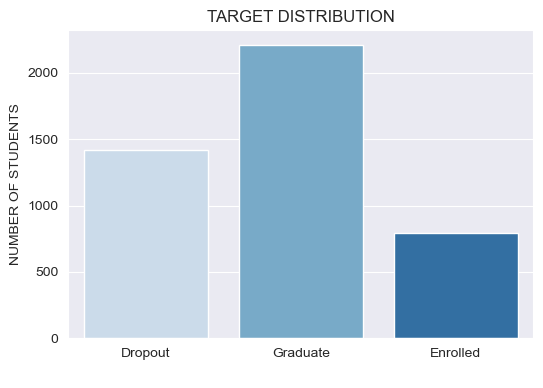

In [14]:
print("\nTARGET DISTRIBUTION:")
print ('--------------------')
target_counts = df['target'].value_counts()
for cat, count in target_counts.items():
    print(f"{cat}: {count}")
print()
print(f"Dropout rate: {target_counts['Dropout'] / len(df) * 100:.2f}%")
print(f"Graduation rate: {target_counts['Graduate'] / len(df) * 100:.2f}%")
print(f"Still enrolled: {target_counts['Enrolled'] / len(df) * 100:.2f}%")
sns.set_style("darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Blues')
plt.title('TARGET DISTRIBUTION')
plt.xlabel(' ')
plt.ylabel('NUMBER OF STUDENTS')
plt.show()

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

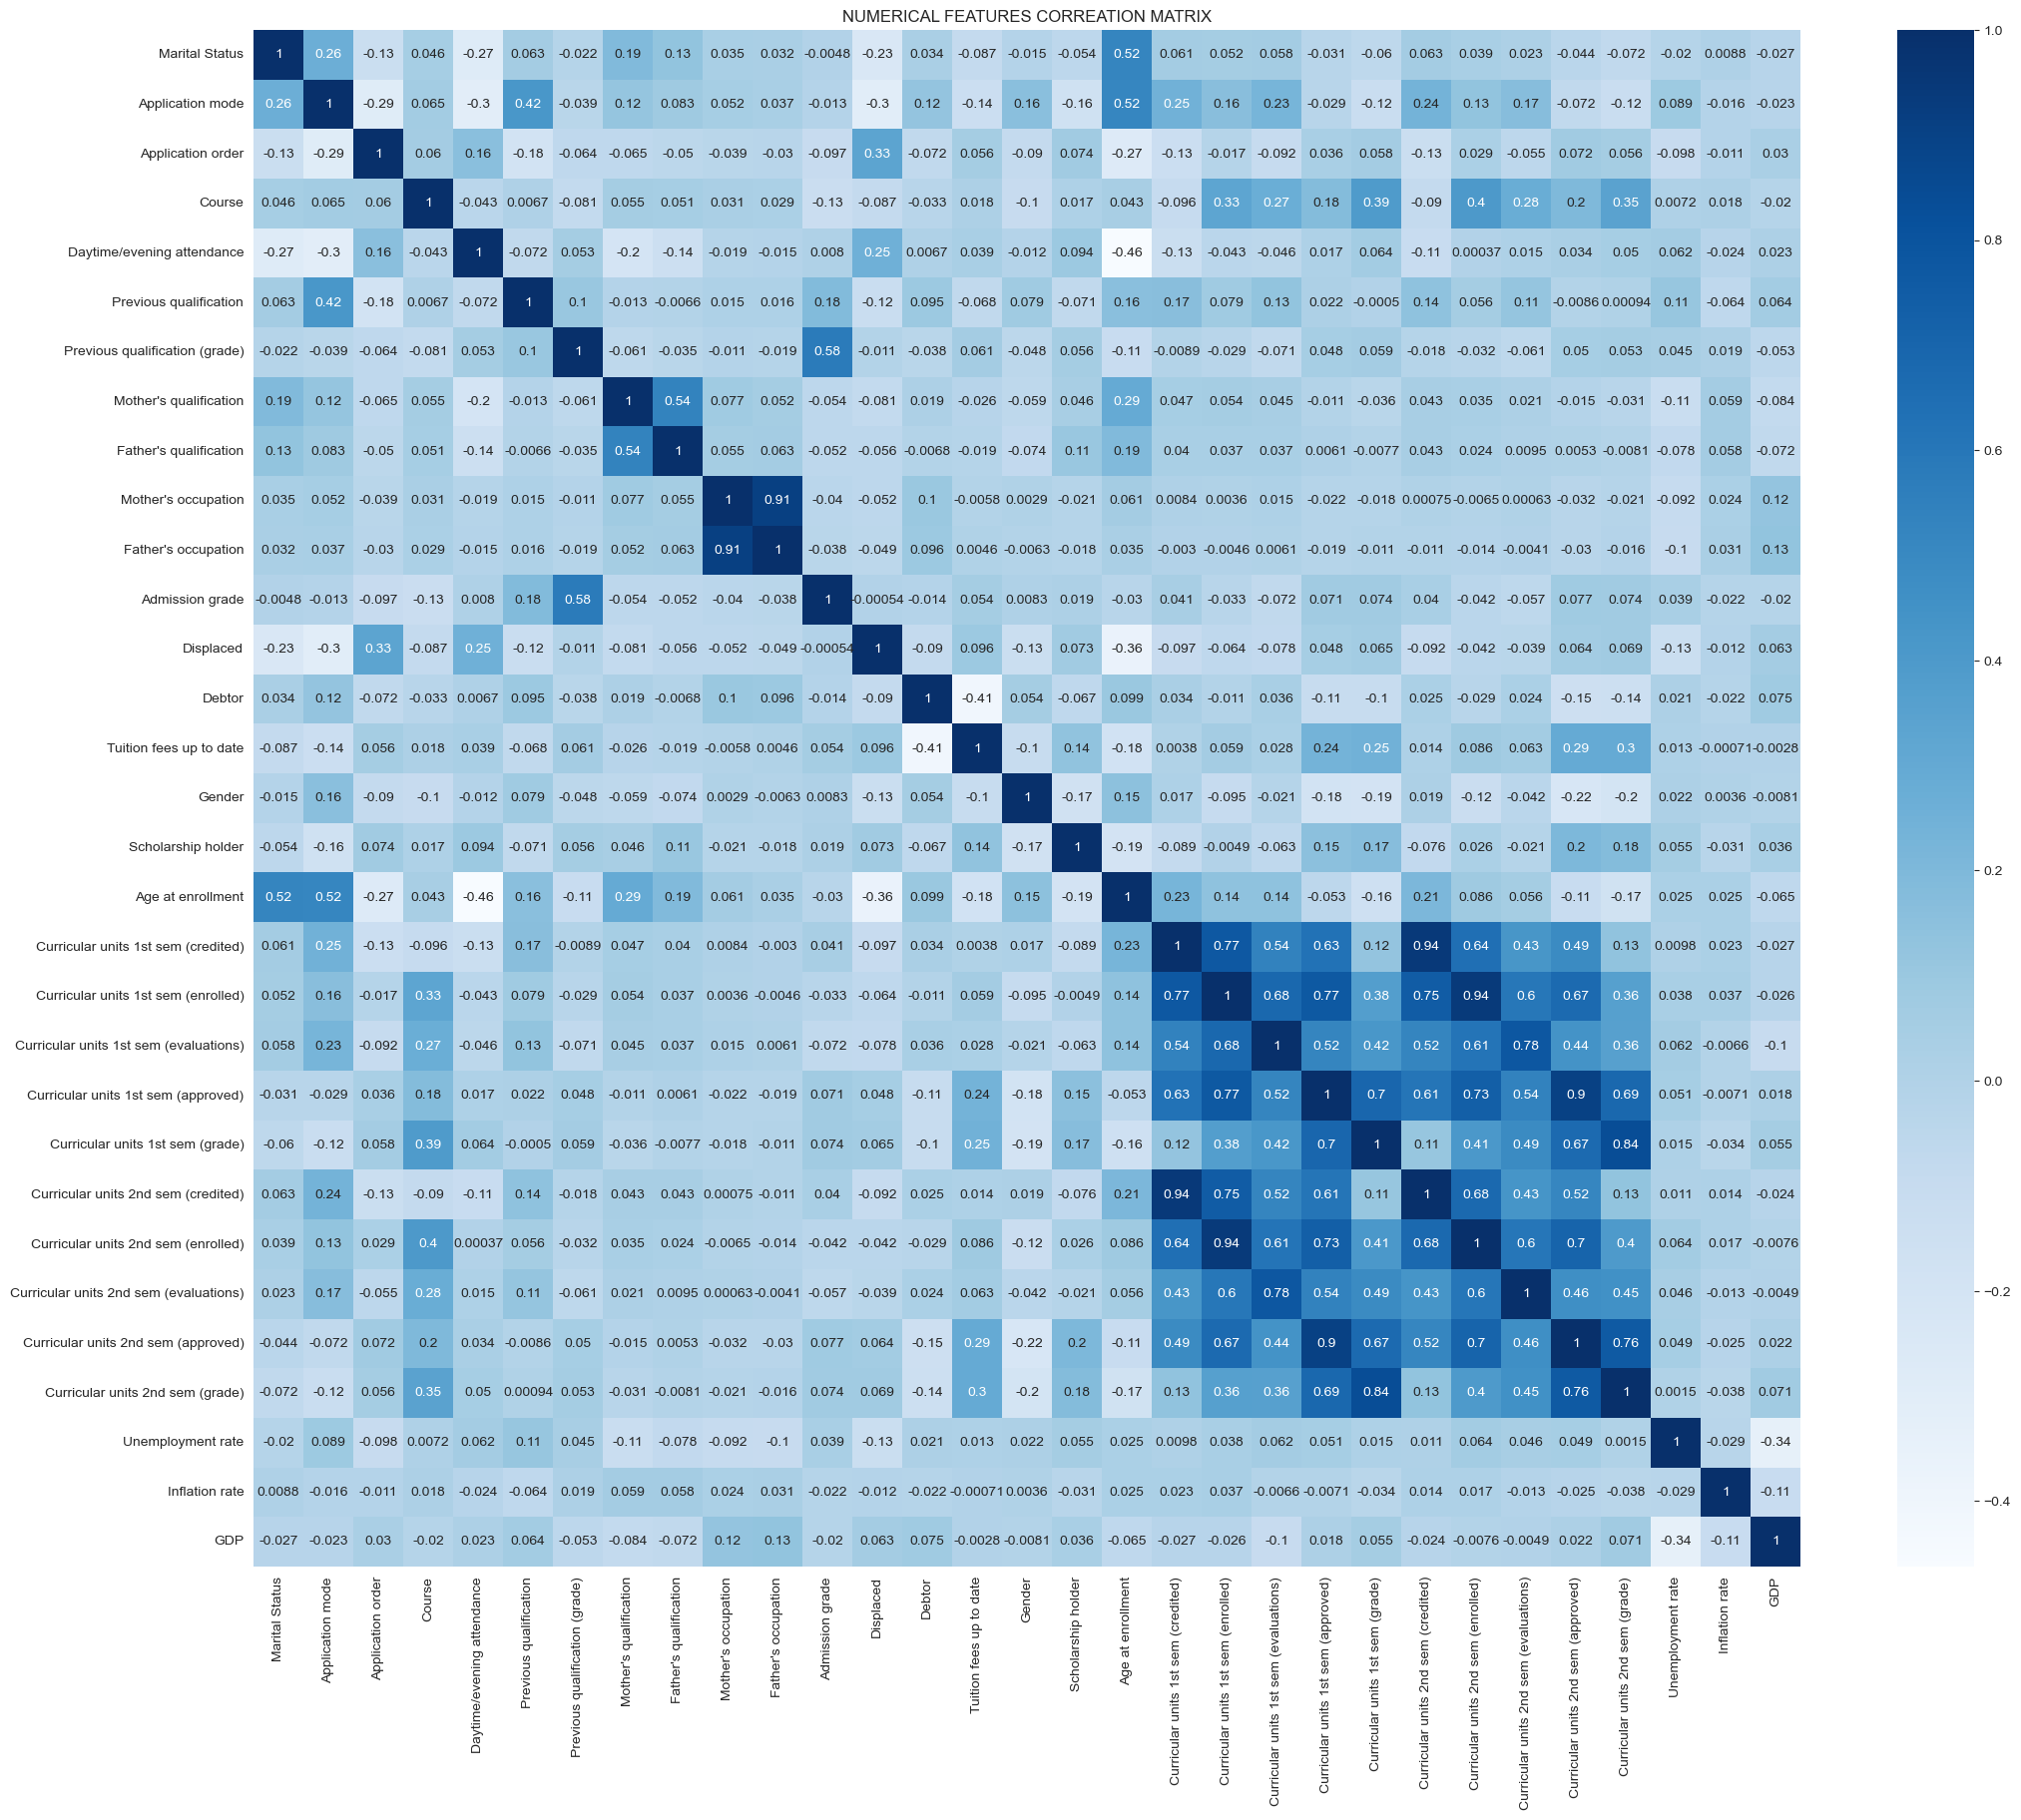

In [17]:
plt.figure(figsize=(25,20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('NUMERICAL FEATURES CORREATION MATRIX')
plt.show()

In [19]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
corr_matrix = df[numerical_cols].corr().abs()
to_drop = set()

In [22]:
print ('HIGH CORRELATION BETWEEN VARIABLES:')
print ('----------------------------------')
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.7:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            to_drop.add(colname2)
            print(f'HIGH CORRELATION BETWEEN "{colname1}" AND "{colname2}" ({corr_matrix.iloc[i, j]:.2f})')
    
df_reduced = df.drop(columns=list(to_drop))
print("\nCOLUMNS DELETED BY HIGH CORRELATION:")
print('--------------------------------------')
for col in to_drop:
    print(col)
print("\nFINAL NUMERICAL COLUMNS:")
print('-------------------------')

for col in df_reduced.select_dtypes(include=[np.number]).columns:
    print(col)

HIGH CORRELATION BETWEEN VARIABLES:
----------------------------------
HIGH CORRELATION BETWEEN "Father's occupation" AND "Mother's occupation" (0.91)
HIGH CORRELATION BETWEEN "Curricular units 1st sem (enrolled)" AND "Curricular units 1st sem (credited)" (0.77)
HIGH CORRELATION BETWEEN "Curricular units 1st sem (approved)" AND "Curricular units 1st sem (enrolled)" (0.77)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (credited)" AND "Curricular units 1st sem (credited)" (0.94)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (credited)" AND "Curricular units 1st sem (enrolled)" (0.75)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (enrolled)" AND "Curricular units 1st sem (enrolled)" (0.94)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (enrolled)" AND "Curricular units 1st sem (approved)" (0.73)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (evaluations)" AND "Curricular units 1st sem (evaluations)" (0.78)
HIGH CORRELATION BETWEEN "Curricular units 2nd sem (approve

In [23]:
key_numerical_cols = [
'Previous qualification (grade)',
'Admission grade',
'Age at enrollment',
'Curricular units 2nd sem (grade)',
'Unemployment rate',
'Inflation rate',
'GDP'
]

In [26]:
print("CHECKING FOR OUTLIERS IN KEY COLUMNS :")
print('-------------------------------------')
for col in key_numerical_cols:
    Q1 = df_reduced[col].quantile(0.25)
    Q3 = df_reduced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_reduced[(df_reduced[col] < lower_bound) | (df_reduced[col] > upper_bound)]
    outlier_count = len(outliers)
    percentage = (outlier_count / len(df_reduced)) * 100
    print(f"{col}: {outlier_count} OUTLIERS ({percentage:.2f}%)")

CHECKING FOR OUTLIERS IN KEY COLUMNS :
-------------------------------------
Previous qualification (grade): 179 OUTLIERS (4.05%)
Admission grade: 86 OUTLIERS (1.94%)
Age at enrollment: 441 OUTLIERS (9.97%)
Curricular units 2nd sem (grade): 877 OUTLIERS (19.82%)
Unemployment rate: 0 OUTLIERS (0.00%)
Inflation rate: 0 OUTLIERS (0.00%)
GDP: 0 OUTLIERS (0.00%)


In [28]:
print ('OUTLIERS IMPUTED:')
print ('----------------')
for col in key_numerical_cols:
    Q1 = df_reduced[col].quantile(0.25)
    Q3 = df_reduced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_reduced[col].median()
    df_reduced[col] = df_reduced[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    print(f"OUTLIERS IMPUTED IN '{col}' WITH THE MEDIAN ({median}).")

OUTLIERS IMPUTED:
----------------
OUTLIERS IMPUTED IN 'Previous qualification (grade)' WITH THE MEDIAN (133.1).
OUTLIERS IMPUTED IN 'Admission grade' WITH THE MEDIAN (126.1).
OUTLIERS IMPUTED IN 'Age at enrollment' WITH THE MEDIAN (20.0).
OUTLIERS IMPUTED IN 'Curricular units 2nd sem (grade)' WITH THE MEDIAN (12.2).
OUTLIERS IMPUTED IN 'Unemployment rate' WITH THE MEDIAN (11.1).
OUTLIERS IMPUTED IN 'Inflation rate' WITH THE MEDIAN (1.4).
OUTLIERS IMPUTED IN 'GDP' WITH THE MEDIAN (0.32).


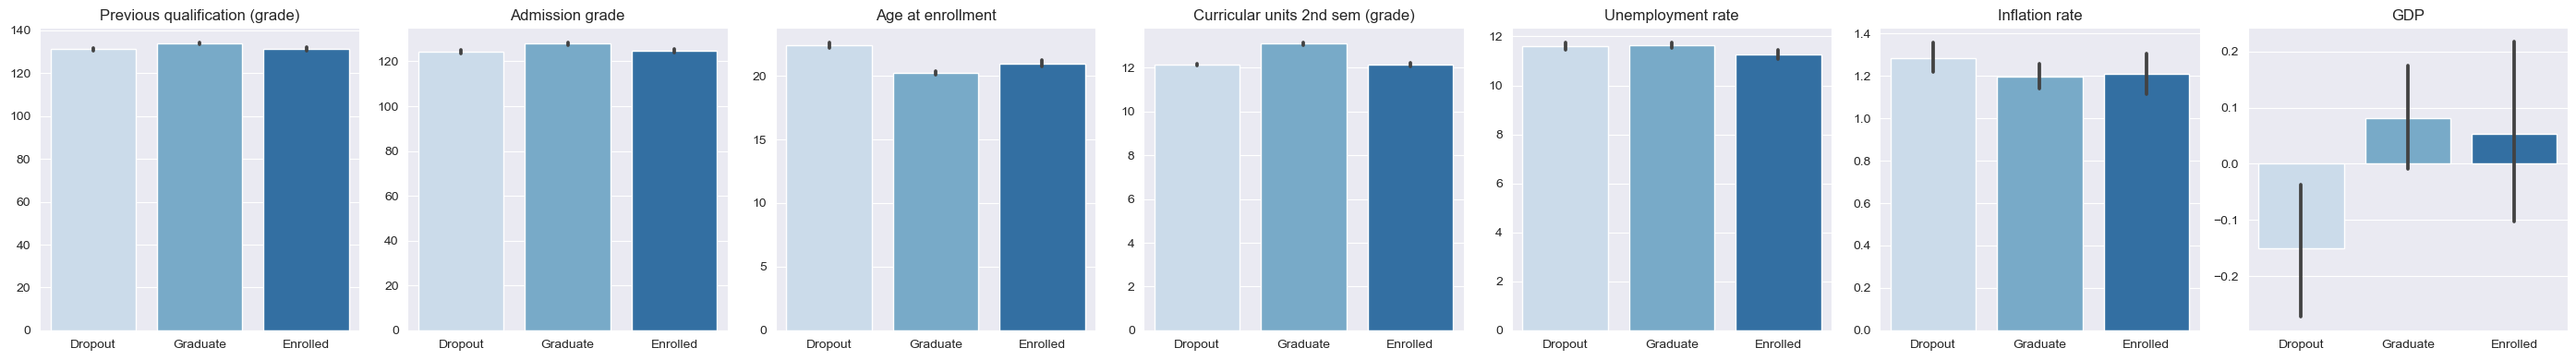

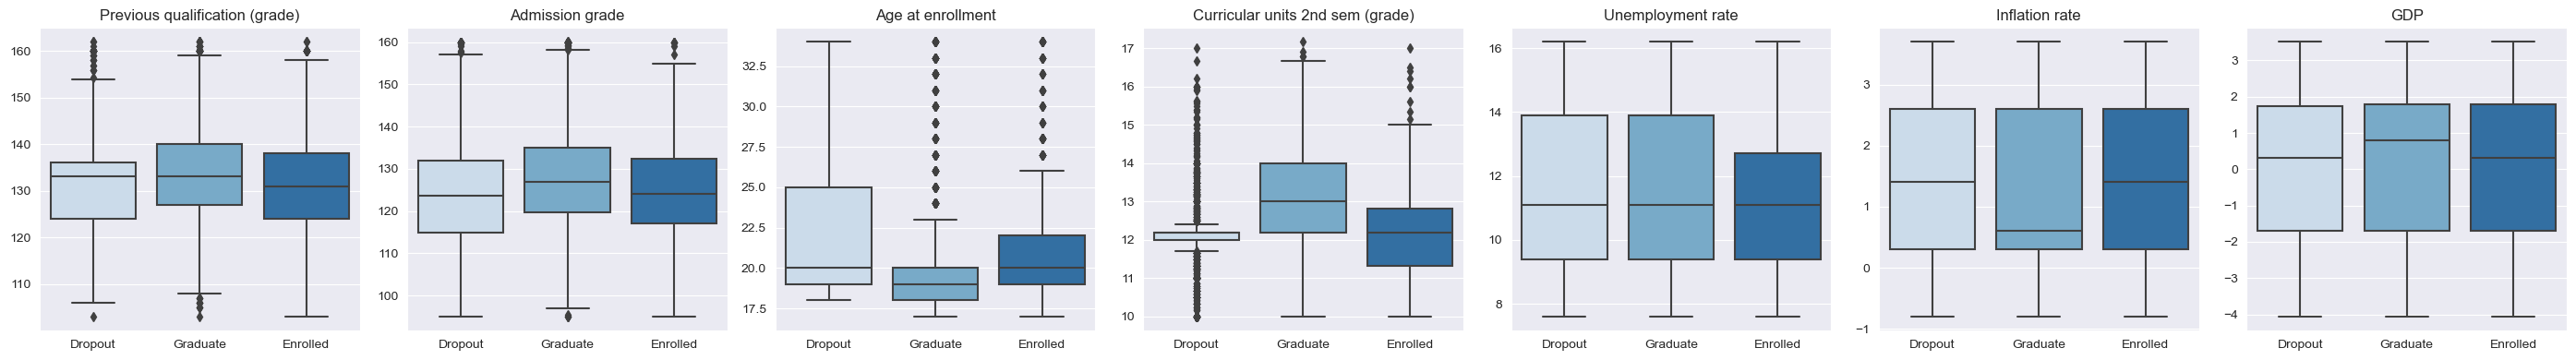

In [29]:
fig, axes = plt.subplots(1, len(key_numerical_cols), figsize=(4 * len(key_numerical_cols), 4))

for i, col in enumerate(key_numerical_cols):
    sns.barplot(x='target', y=col, data=df_reduced, ax=axes[i], palette='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(key_numerical_cols), figsize=(4 * len(key_numerical_cols), 4))

for i, col in enumerate(key_numerical_cols):
    sns.boxplot(x='target', y=col, data=df_reduced, ax=axes[i], palette='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
print ('BINARY FEATURES:')
print ('----------------')
[col for col in ['Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder'] if col in df_reduced.columns]

BINARY FEATURES:
----------------


['Displaced',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder']

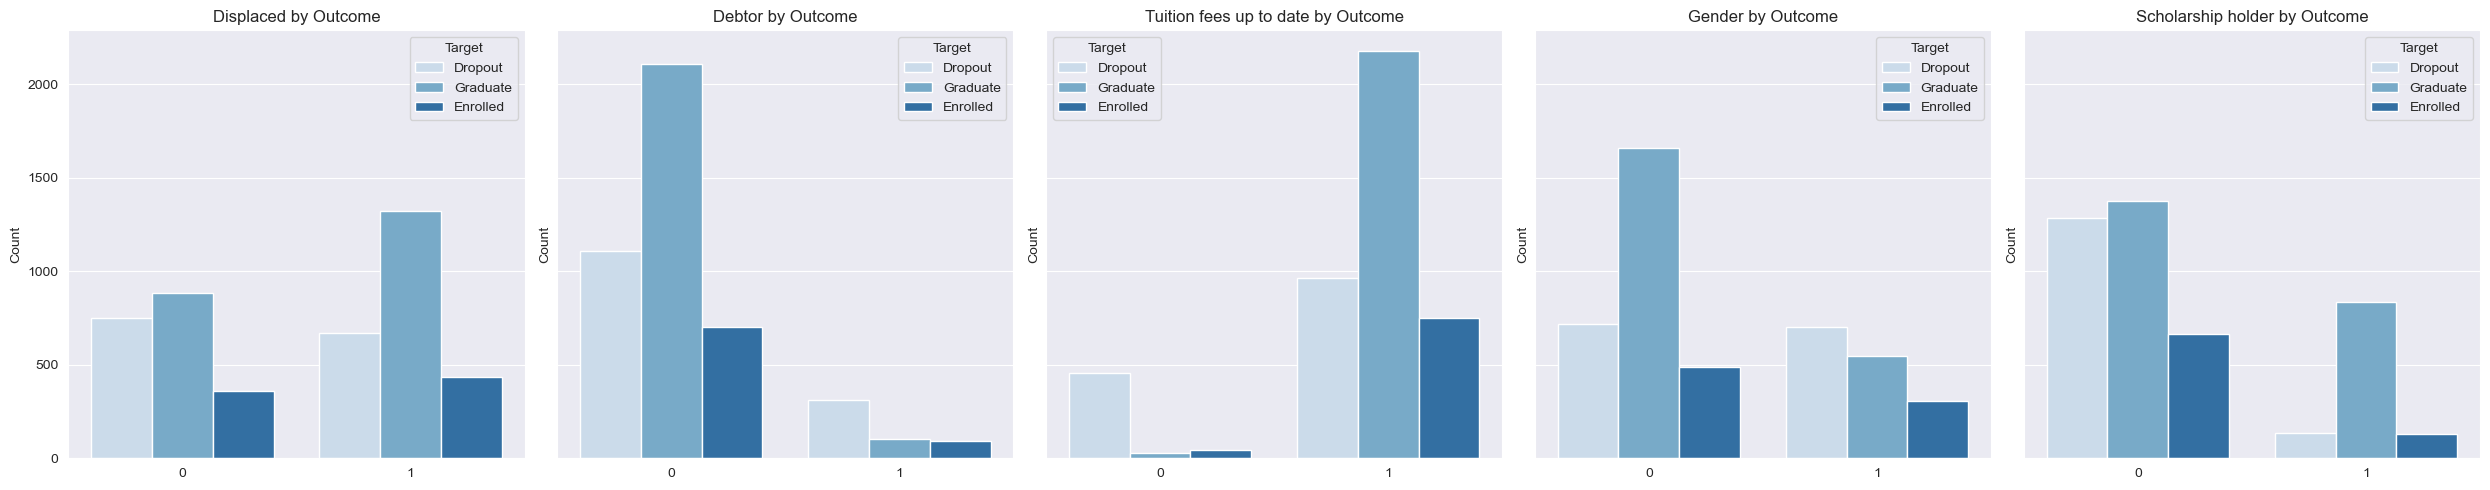

In [33]:
binary_cols = ['Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']
fig, axes = plt.subplots(1, len(binary_cols), figsize=(5 * len(binary_cols), 5), sharey=True)

for i, col in enumerate(binary_cols):
    sns.countplot(data=df_reduced, x=col, hue='target', ax=axes[i], palette='Blues')
    axes[i].set_title(f'{col} by Outcome')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Target')
    
plt.tight_layout()
plt.show()

In [34]:
categorical_cols = df_reduced.select_dtypes(include='object').columns.tolist()

extra_cats = [
    'Marital Status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Mother\'s qualification',
    'Father\'s qualification'
]
categorical_cols = list(set(categorical_cols + extra_cats))

print("FINAL CATEGORICAL FEATURES:")
print("--------------------------")

for col in categorical_cols:
    print(col)

FINAL CATEGORICAL FEATURES:
--------------------------
Previous qualification
Daytime/evening attendance
Course
Application mode
Father's qualification
Marital Status
Mother's qualification
Application order
target


In [35]:
print ('CATEGORICAL FEATURES UNIQUE VALUES:')
print ('----------------------------------')
for col in categorical_cols:
    print(f"{col}: {df_reduced[col].nunique()} UNIQUE VALUES")

CATEGORICAL FEATURES UNIQUE VALUES:
----------------------------------
Previous qualification: 17 UNIQUE VALUES
Daytime/evening attendance: 2 UNIQUE VALUES
Course: 17 UNIQUE VALUES
Application mode: 18 UNIQUE VALUES
Father's qualification: 34 UNIQUE VALUES
Marital Status: 6 UNIQUE VALUES
Mother's qualification: 29 UNIQUE VALUES
Application order: 8 UNIQUE VALUES
target: 3 UNIQUE VALUES


In [36]:
print ('TARGET MAPING:')
print ('-------------')
print ('Dropout: 0')
print ('Enrolled: 1')
print ('Graduate: 2')
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_reduced['target'] = df_reduced['target'].map(target_map)

TARGET MAPING:
-------------
Dropout: 0
Enrolled: 1
Graduate: 2
